In [1]:
# Cargar las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro

**Cargamos el DataSet sin outliers**

In [17]:
# Cargar el DataSet
df_troll_2024_sin_outliers = pd.read_csv('../data/processed/troll_a_2024_sin_outliers.csv')
df_troll_2024_sin_outliers.head(20)

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN
0,1087799999,2024-01-01,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",3.777778,-2.944444,9999.9,999.9,0.997791,50.5596,62.9680,1851.8148,5.0,2.0
1,1087799999,2024-01-02,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",1.888889,-5.277778,9999.9,999.9,0.997791,51.3004,66.4868,1851.8148,3.0,0.0
2,1087799999,2024-01-03,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",-0.222222,-8.277778,9999.9,999.9,0.997791,33.1508,53.5228,1851.8148,1.0,-1.0
3,1087799999,2024-01-04,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",0.388889,-6.277778,9999.9,999.9,0.981697,34.8176,48.1520,1851.8148,1.0,-1.0
4,1087799999,2024-01-05,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",-0.388889,-7.777778,9999.9,999.9,0.997791,27.7800,42.4108,1851.8148,0.0,-1.0
5,1087799999,2024-01-06,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",0.722222,-5.777778,9999.9,999.9,0.997791,32.5952,51.8560,1851.8148,2.0,0.0
6,1087799999,2024-01-07,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",2.833333,0.166667,9999.9,999.9,0.981697,48.5224,59.4492,1851.8148,4.0,2.0
7,1087799999,2024-01-08,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",4.444444,2.666667,9999.9,999.9,0.869044,26.4836,37.0400,1851.8148,6.0,3.0
8,1087799999,2024-01-09,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",5.388889,3.111111,9999.9,999.9,0.997791,30.1876,57.5972,1851.8148,6.0,5.0
9,1087799999,2024-01-10,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",6.277778,1.777778,9999.9,999.9,0.997791,61.6716,68.3388,1851.8148,7.0,6.0


**Determinar la distribución de los datos**

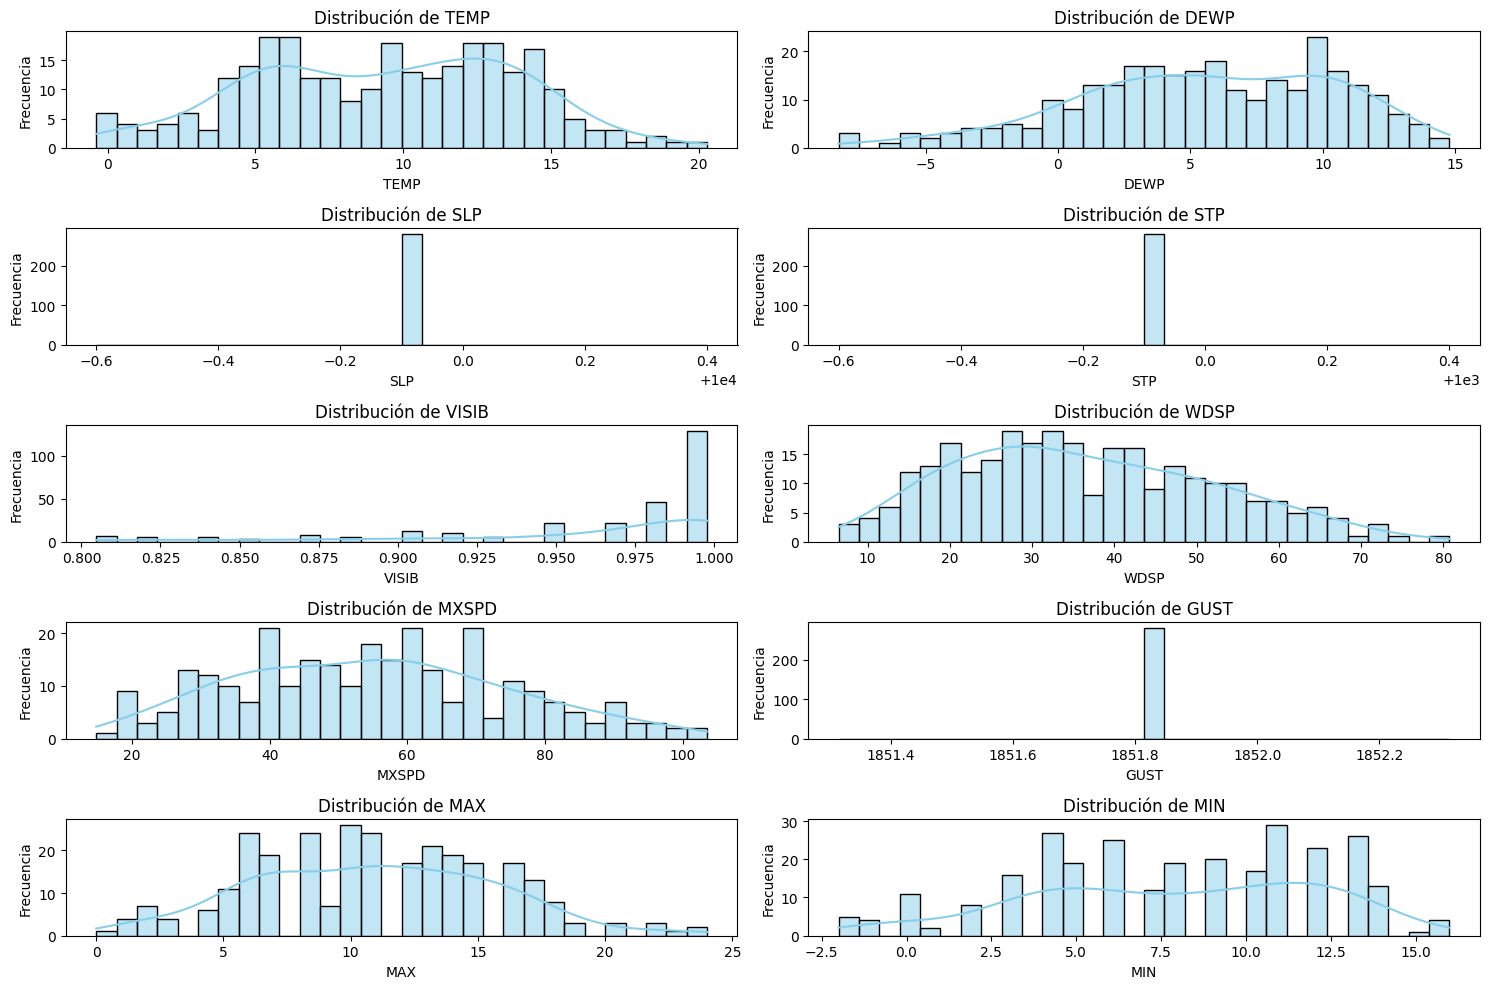

In [18]:
col_lista = ['TEMP', 'DEWP', 'SLP', 'STP', 'VISIB', 'WDSP', 'MXSPD', 'GUST', 'MAX', 'MIN']

plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura para que quepan todos los histogramas

for i, col in enumerate(col_lista):
    plt.subplot(5, 2, i + 1)  # Crea subgráficos en una cuadrícula de 5x2
    sns.histplot(df_troll_2024_sin_outliers[col], bins=30, color='skyblue', kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()

* TEMP, MAX y MIN tienen una distribución normal.
* DEWP y WDSP tienen una distribución normal.
* VISIB podría considerarse una distribución beta.
* WDSP y MXSPD podrian considerarse distribuciones Gamma.
* SLP, STP y GUST no tienen una distribución probabilística típica debido a la falta de variabilidad (Se descartan del análisis debido a la falta de variabilidad ya que es necesario para el análisis estadístico).

**Se realizara unas pruebas estadísticas de normalidad (como la prueba de Shapiro-Wilk) para confirmar**

In [19]:
col_lista2 = ['TEMP', 'DEWP', 'VISIB', 'WDSP', 'MXSPD', 'MAX', 'MIN']

In [20]:

for columna in col_lista2:
    stat, p = shapiro(df_troll_2024_sin_outliers[columna])
    print(f'\nPrueba de Shapiro-Wilk para {columna}: Estadístico={stat}, p={p}')
    alpha = 0.05
    if p > alpha:
        print(f'{columna} parece tener una distribución normal (no se rechaza la hipótesis nula)')
    else:
        print(f'{columna} no parece tener una distribución normal (se rechaza la hipótesis nula)')


Prueba de Shapiro-Wilk para TEMP: Estadístico=0.9827954889378826, p=0.0018427821954684986
TEMP no parece tener una distribución normal (se rechaza la hipótesis nula)

Prueba de Shapiro-Wilk para DEWP: Estadístico=0.9778593181394415, p=0.00023780619873288968
DEWP no parece tener una distribución normal (se rechaza la hipótesis nula)

Prueba de Shapiro-Wilk para VISIB: Estadístico=0.7215488442065502, p=2.289244316088672e-21
VISIB no parece tener una distribución normal (se rechaza la hipótesis nula)

Prueba de Shapiro-Wilk para WDSP: Estadístico=0.9786846266396634, p=0.00033053151464648126
WDSP no parece tener una distribución normal (se rechaza la hipótesis nula)

Prueba de Shapiro-Wilk para MXSPD: Estadístico=0.9852656752712367, p=0.005523317657600479
MXSPD no parece tener una distribución normal (se rechaza la hipótesis nula)

Prueba de Shapiro-Wilk para MAX: Estadístico=0.9880257331001535, p=0.01989747667189898
MAX no parece tener una distribución normal (se rechaza la hipótesis nul

* TEMP, DEWP, VISIB, WDSP, MXSPD, MAX y MIN:
    * El valor p es menor que 0.05 para todas estas variables. Por lo tanto, se rechaza la hipótesis nula y se concluye que estas variables no siguen una distribución normal.
    
( utilizar pruebas estadísticas no paramétricas, ya que la mayoría de tus datos no son normales.)

 **TEMP, DEWP, MAX y MIN** mostraron una distribución que se asemeja a la normal, aunque la prueba de Shapiro-Wilk rechazó la normalidad. Debido a que tenemos un tamaño de muestra relativamente grande, podemos usar el teorema del límite central y asumir que la distribución de la media muestral se aproxima a una distribución normal. podemos utilizar intervalos de confianza basados en la distribución t de Student para estas variables.

### **Intervalos de Confianza**

In [50]:
for i in col_lista2:

    datos = df_troll_2024_sin_outliers[i]

    # Nivel de confianza (por ejemplo, 95%)
    nivel_confianza = 0.95

    # Calcular el intervalo de confianza
    intervalo = stats.t.interval(nivel_confianza, len(datos)-1, loc=np.mean(datos), scale=stats.sem(datos))

    print(f"Intervalo de confianza al {nivel_confianza*100:.0f}% ({i}): {intervalo}")

Intervalo de confianza al 95% (TEMP): (np.float64(8.781253545521654), np.float64(9.815029570334417))
Intervalo de confianza al 95% (DEWP): (np.float64(4.948089208710519), np.float64(6.087497979901581))
Intervalo de confianza al 95% (VISIB): (np.float64(0.9552970103253677), np.float64(0.9676638380732085))
Intervalo de confianza al 95% (WDSP): (np.float64(34.653603443278776), np.float64(38.29674246419453))
Intervalo de confianza al 95% (MXSPD): (np.float64(52.649043258569456), np.float64(57.271440727195674))
Intervalo de confianza al 95% (MAX): (np.float64(10.310775786319942), np.float64(11.42587901795052))
Intervalo de confianza al 95% (MIN): (np.float64(7.271944909262279), np.float64(8.279656514225266))


**VISIB, WDSP y MXSPD** no siguen una distribución normal. Para estas variables, podemos utilizar intervalos de confianza no paramétricos, como los intervalos de confianza de bootstrap.

In [51]:
# Función para calcular la media (puedes usar otras funciones estadísticas)
def media_bootstrap(datos):
    return np.mean(datos)

for i in col_lista2:
    datos = df_troll_2024_sin_outliers[i]
    # Calcular el intervalo de confianza bootstrap
    intervalo = stats.bootstrap((datos,), media_bootstrap, confidence_level=0.95)

    print(f"Intervalo de confianza bootstrap al 95% ({i}): {intervalo.confidence_interval}")

Intervalo de confianza bootstrap al 95% (TEMP): ConfidenceInterval(low=np.float64(8.778014290909077), high=np.float64(9.81021031603704))
Intervalo de confianza bootstrap al 95% (DEWP): ConfidenceInterval(low=np.float64(4.937176871570343), high=np.float64(6.071940718022576))
Intervalo de confianza bootstrap al 95% (VISIB): ConfidenceInterval(low=np.float64(0.9547223416370106), high=np.float64(0.9670930690391458))
Intervalo de confianza bootstrap al 95% (WDSP): ConfidenceInterval(low=np.float64(34.67523985765124), high=np.float64(38.260168925365996))
Intervalo de confianza bootstrap al 95% (MXSPD): ConfidenceInterval(low=np.float64(52.62880655151266), high=np.float64(57.350773087310536))
Intervalo de confianza bootstrap al 95% (MAX): ConfidenceInterval(low=np.float64(10.316725978647687), high=np.float64(11.419928825622776))
Intervalo de confianza bootstrap al 95% (MIN): ConfidenceInterval(low=np.float64(7.266903914590747), high=np.float64(8.270462633451958))


**SLP, STP, GUST**. Estas variables tienen muy poca variabilidad, lo que dificulta la estimación de intervalos de confianza significativos. Debido a la naturaleza de estos datos, no se recomienda calcular intervalos de confianza para estas variables. (Se descarta del análisis)

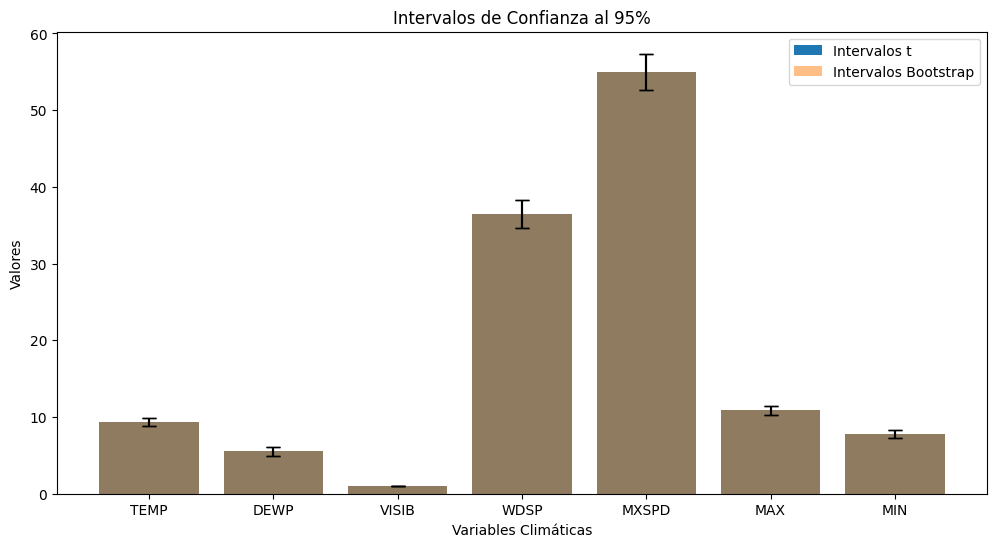

In [52]:
# Datos de ejemplo (reemplaza con tus datos reales)
variables = col_lista2
medias = [np.mean(df_troll_2024_sin_outliers[var]) for var in variables]
intervalos_t = [(8.78, 9.82), (4.95, 6.09), (0.955, 0.968), (34.65, 38.30), (52.65, 57.27), (10.31, 11.43), (7.27, 8.28)]  # Intervalos de confianza de la distribución t
intervalos_bootstrap = [(8.78, 9.81), (4.94, 6.07), (0.955, 0.967), (34.68, 38.26), (52.63, 57.35), (10.32, 11.42), (7.27, 8.27)]  # Intervalos de confianza bootstrap

# Calcula los errores para las barras de error
errores_t = [(superior - media) for (inferior, superior), media in zip(intervalos_t, medias)]
errores_bootstrap = [(superior - media) for (inferior, superior), media in zip(intervalos_bootstrap, medias)]

# Crea el gráfico de barras con barras de error
plt.figure(figsize=(12, 6))
plt.bar(variables, medias, yerr=errores_t, capsize=5, label='Intervalos t')
plt.bar(variables, medias, yerr=errores_bootstrap, capsize=5, label='Intervalos Bootstrap', alpha=0.5)  # Añade una barra de error para bootstrap con transparencia

# Añade etiquetas y título
plt.xlabel('Variables Climáticas')
plt.ylabel('Valores')
plt.title('Intervalos de Confianza al 95%')
plt.legend()

# Muestra el gráfico
plt.show()

### **Pueba de Hipotesis**

### **1. Hipótesis sobre la Temperatura Promedio (Variación Mensual):**
* H0: La temperatura promedio en la plataforma Troll A en 2024 no muestra variaciones significativas a lo largo de los meses del año.
* H1: La temperatura promedio en la plataforma Troll A en 2024 varía significativamente a lo largo de los meses del año.


1. Prueba ANOVA (análisis de varianza) paa comprobar las medias de temperatura entre los diferenes meses.
2. Prueba de Kruskal - Wallis si los datos no siguen una distribución normal

In [30]:
# Convertir DATE a tipo datetime
df_troll_2024_sin_outliers['DATE'] = pd.to_datetime(df_troll_2024_sin_outliers['DATE'])

# Crear la columna Mes 
df_troll_2024_sin_outliers['MONTH'] = df_troll_2024_sin_outliers['DATE'].dt.month_name(locale='es_ES')

ANOVA - Estadístico F: 87.11391358766875, Valor p: 5.760028561875947e-82
Kruskal-Wallis - Estadístico H: 225.9972846510991, Valor p: 2.902498186392948e-42


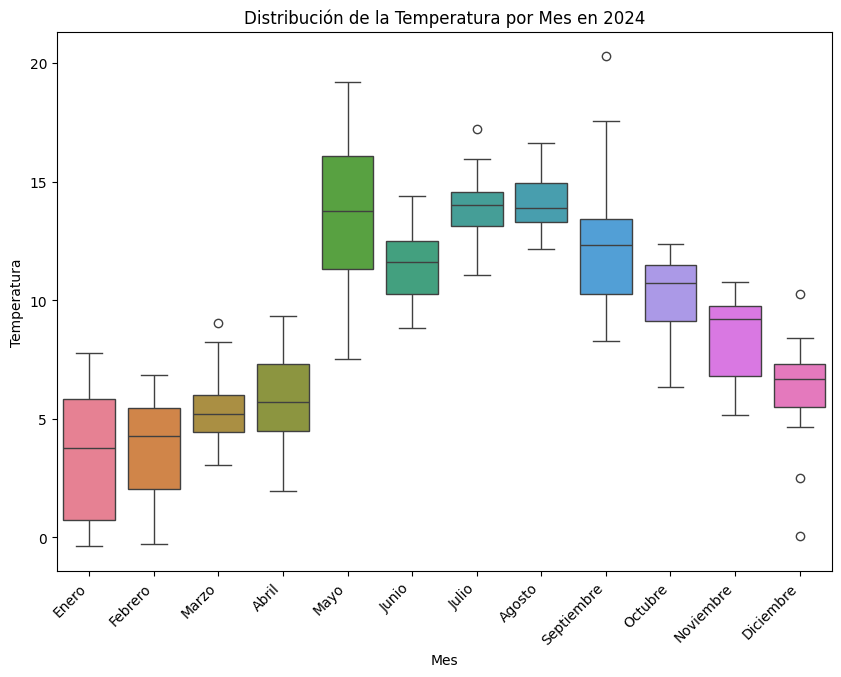

In [80]:
# Agrupa por mes y calcula la temperatura promedio
temperaturas_por_mes = [df_troll_2024_sin_outliers['TEMP'][df_troll_2024_sin_outliers['MONTH'] == mes] for mes in df_troll_2024_sin_outliers['MONTH'].unique()]

# Realiza la prueba ANOVA
f_stat, p_valor = stats.f_oneway(*temperaturas_por_mes)

print(f"ANOVA - Estadístico F: {f_stat}, Valor p: {p_valor}")

# Si los datos no son normales, usa Kruskal-Wallis
h_stat, p_valor_kruskal = stats.kruskal(*temperaturas_por_mes)
print(f"Kruskal-Wallis - Estadístico H: {h_stat}, Valor p: {p_valor_kruskal}")

plt.figure(figsize=(10,7))
sns.boxplot(x='MONTH', y='TEMP', data=df_troll_2024_sin_outliers, hue='MONTH')
plt.title('Distribución de la Temperatura por Mes en 2024')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Mes')
plt.ylabel('Temperatura')
plt.show()

### **Conclución**
- Tanto el gráfico de cajas con los meses ordenados como los resultados estadísticos confirman que la temperatura promedio en la plataforma Troll A en 2024 varía significativamente a lo largo de los meses del año.
- Hay patrones estacionales claros en la temperatura, con temperaturas más bajas en invierno y más altas en verano.
- Las variaciones mensuales son significativas y no se deben al azar.

Es crucial tener en cuenta los patrones estacionales y las variaciones mensuales en la temperatura para garantizar la seguridad y la eficiencia de las operaciones.

### **2. Hipótesis sobre la Velocidad del Viento (Variación Anual):**
* H0: La velocidad promedio del viento en la plataforma Troll A en 2024 no muestra variaciones significativas a lo largo del año.
* H1: La velocidad promedio del viento en la plataforma Troll A en 2024 muestra variaciones significativas a lo largo del año.

ANOVA (viento) - Estadístico F: 2.63272230010102, Valor p: 0.0032844831095663577
Kruskal-Wallis (viento) - Estadístico H: 28.09896851429929, Valor p: 0.0031262251824969198


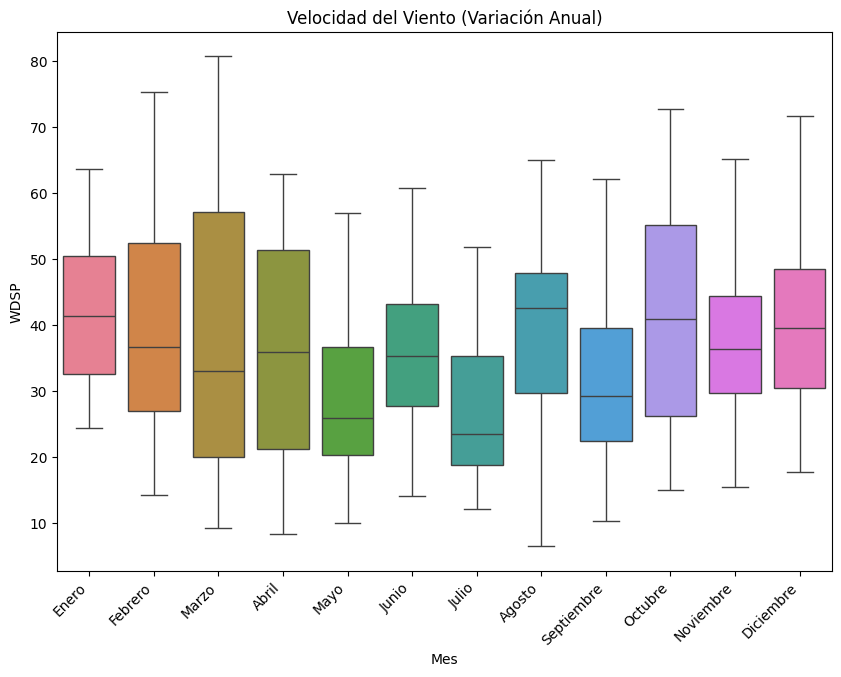

In [86]:
# Agrupa por mes y calcula la velocidad promedio del viento
viento_por_mes = [df_troll_2024_sin_outliers['WDSP'][df_troll_2024_sin_outliers['MONTH'] == mes] for mes in df_troll_2024_sin_outliers['MONTH'].unique()]

# Realiza la prueba ANOVA
f_stat_viento, p_valor_viento = stats.f_oneway(*viento_por_mes)
print(f"ANOVA (viento) - Estadístico F: {f_stat_viento}, Valor p: {p_valor_viento}")

# Si los datos no son normales, usa Kruskal-Wallis
h_stat_viento, p_valor_kruskal_viento = stats.kruskal(*viento_por_mes)
print(f"Kruskal-Wallis (viento) - Estadístico H: {h_stat_viento}, Valor p: {p_valor_kruskal_viento}")

# Visualización
plt.figure(figsize=(10,7))
sns.boxplot(x='MONTH', y='WDSP', data=df_troll_2024_sin_outliers, hue='MONTH')
plt.xticks(rotation=45, ha='right')
plt.title('Velocidad del Viento (Variación Anual)')
plt.xlabel('Mes')
plt.ylabel('WDSP')
plt.show()

### **Conclución**
- Tanto el gráfico de cajas con los meses ordenados como los resultados estadísticos indican que la velocidad promedio del viento en la plataforma Troll A en 2024 muestra variaciones significativas a lo largo del año.
- Esto significa que hay patrones mensuales en la velocidad del viento, con algunos meses que experimentan velocidades del viento más altas o más variables que otros.

Es importante tener en cuenta los patrones estacionales y mensuales en la velocidad del viento al planificar actividades y tomar decisiones.

### **3. Hipótesis sobre la Visibilidad (Correlación):**
* H0: La visibilidad en la plataforma Troll A en 2024 no está correlacionada con otras variables climáticas (como la precipitación o la temperatura).
* H1: La visibilidad en la plataforma Troll A en 2024 está correlacionada con otras variables climáticas.

Calcula los coeficientes de correlación (Pearson o Spearman) entre la visibilidad y otras variables climáticas relevantes.

Correlación VISIB-TEMP: -0.037191669208754746
Correlación VISIB-DEWP: -0.2016657745011354


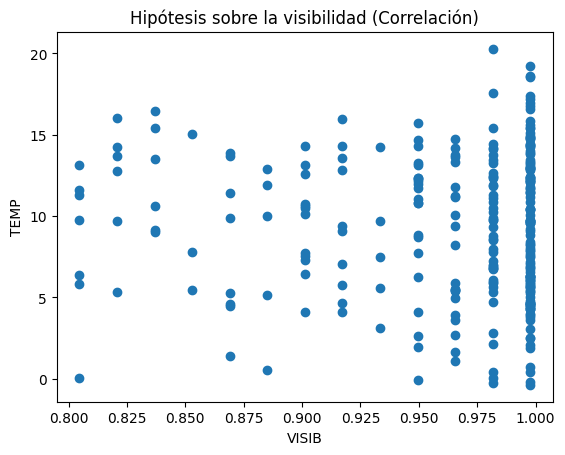

In [53]:
# Calcula la correlación entre VISIB y otras variables (TEMP y DEWP como ejemplo)
correlacion_visib_temp = df_troll_2024_sin_outliers['VISIB'].corr(df_troll_2024_sin_outliers['TEMP'])
correlacion_visib_dewp = df_troll_2024_sin_outliers['VISIB'].corr(df_troll_2024_sin_outliers['DEWP'])

print(f"Correlación VISIB-TEMP: {correlacion_visib_temp}")
print(f"Correlación VISIB-DEWP: {correlacion_visib_dewp}")

# Visualización
plt.scatter(df_troll_2024_sin_outliers['VISIB'], df_troll_2024_sin_outliers['TEMP'])
plt.title('Hipótesis sobre la visibilidad (Correlación)')
plt.xlabel('VISIB')
plt.ylabel('TEMP')
plt.show()

### **Conclución**
- Los resultados de correlación y el gráfico de dispersión sugieren que la visibilidad (VISIB) tiene una correlación muy débil con la temperatura (TEMP) y una correlación negativa débil con el punto de rocío (DEWP).
- Por lo tanto, la hipótesis nula (H0) de que la visibilidad no está correlacionada con estas variables climáticas no puede ser rechazada con fuerza, especialmente en el caso de la temperatura.
- Sin embargo, existe una ligera correlación negativa con el punto de rocío (DEWP)

La falta de una correlación fuerte entre la visibilidad y la temperatura sugiere que otros factores climáticos (como la humedad, la precipitación o la presencia de niebla) pueden tener un impacto más significativo en la visibilidad en la plataforma Troll A. La ligera correlación negativa con el punto de rocío (DEWP) podría indicar que la humedad juega un papel en la visibilidad, pero la relación no es muy fuerte.